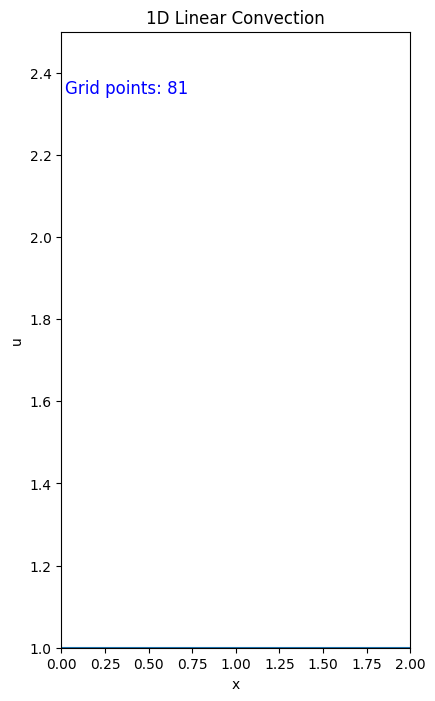

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time, sys

# declare varaibles
nx = 81
nt = 30
dx = 2 / (nx - 1)
dt = 0.025
c = 1

x = np.linspace(0, 2, nx)
# initial conditions
u = np.ones(nx) 
u[int(0.5 / dx):int(1 / dx + 1)] = 2

# array for the updated values
un = np.ones(nx)

fig, ax = plt.subplots(figsize=(4.5,8))
line, = ax.plot(x, u)
ax.set_ylim(1, 2.5)
ax.set_xlim(0, 2)
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_title('1D Linear Convection')

# Add annotation for number of grid points
text = ax.text(0.02, 2.35, f'Grid points: {nx}', fontsize=12, color='blue')

# time-stepping loop
def update_frame(n):
    global u, un
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])
    line.set_ydata(u)
    # Update annotation (if you want to update it dynamically, e.g., if nx changes)
    text.set_text(f'Grid points: {nx}')
    return line, text

ani = animation.FuncAnimation(fig, update_frame, frames=nt, blit=True, repeat=False)
from matplotlib.animation import PillowWriter

ani.save(f'animation_{nx}_grid_points.gif', writer=PillowWriter(fps=10))
HTML(ani.to_jshtml())



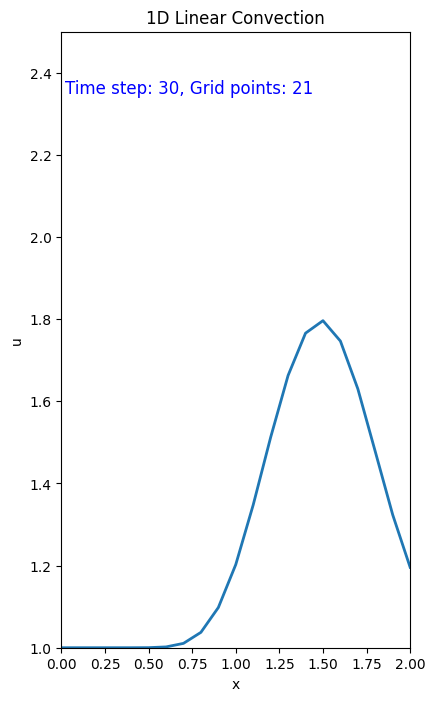

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML

# Declare variables
nx = 21
nt = 30
dx = 2 / (nx - 1)
dt = 0.025
c = 1

x = np.linspace(0, 2, nx)

# Initial conditions
u = np.ones(nx)
u[int(0.5 / dx):int(1 / dx + 1)] = 2

# Array for the updated values
un = np.ones(nx)

fig, ax = plt.subplots(figsize=(4.5, 8))
line, = ax.plot(x, u, lw=2)
ax.set_ylim(1, 2.5)
ax.set_xlim(0, 2)
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_title('1D Linear Convection')

# Add annotation for number of grid points
text = ax.text(0.02, 2.35, f'Grid points: {nx}', fontsize=12, color='blue')

# Store all frames including initial condition
frames = [u.copy()]
for n in range(nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])
    frames.append(u.copy())

# Animation update function
def update_frame(n):
    line.set_ydata(frames[n])
    text.set_text(f'Time step: {n}, Grid points: {nx}')
    return line, text

ani = animation.FuncAnimation(fig, update_frame, frames=len(frames), blit=True, repeat=False)

# Save animation
ani.save(f'animation_{nx}_grid_points.gif', writer=PillowWriter(fps=10))

# Display in notebook (if using Jupyter)
HTML(ani.to_jshtml())
